In [8]:
import numpy as np

### task 1 
>Write a Python/NumPy code block that finds the distinct/unique common items between these two arrays:

In [3]:
# some code here
a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

np.intersect1d(a,b)

array([2, 4])

###  task 2

> 2. Create the following 5x3 array using knowledge you have of Python’s / NumPy’s sequencing functionality so that you
do not need to explicitly key in every integer value.

In [4]:
#solution as sugested by reading arange + reshape array  methods
np.arange(15).reshape(5,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

### TASK 3
>You are given the following two arrays:  
a = np.array([12, 5, 7, 15, 3, 1, 8])  
b = np.array([14, 6, 3, 11, 19, 12, 5])  
Write a Python/Numpy code block that removes from array a any items that are also present in array b.


In [5]:
a = np.array([12, 5, 7, 15, 3, 1, 8])
b = np.array([14, 6, 3, 11, 19, 12, 5])

a = np.setdiff1d(a,b)

print(a)

[ 1  7  8 15]


### task 4
>Suppose you have ridden a bicycle from New York City to Key West, Florida. Your bicycle odometer shows the total
miles you have travelled thus far, which you make a note of each day with paper and pencil. Your first two entries might
be ‘55’ and ‘120’, indicating that you rode your bike 55 miles on day 1 and 65 miles on day 2. Your task is to create a
NumPy array wherein 
you can record the cumulative miles you recorded each day during your trip. Then use your Python skills to show the total miles that you rode each day.
>
>
>Assume the trip took a total of 35 days and included at
least 4 non-consecutive days where no cycling was possible due to either weather conditions or personal
fatigue/soreness. For the remaining 31 days, you would have covered the entire distance between NYC and Key West.
Complete your work within your Jupyter Notebook for this assignment and be sure to include a writeup explaining your
approach to this problem, including the ways in which you decided to make use of NumPy.

task to create a random walk:
   4 days with no cycling 
   35 days total
   total distance to travel = 1610
   
  this program still sometimes throws an error related to the insert of rest days that I can't track down

In [82]:
#generate the random walk 
import random
# implemented a solution found here https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
def bikeride(distance,days,restdays):
    """cacualte a running total amount to sum distance with days number of elements and restdays
    number of zeros interspersed
    """
    #randomly select days-restdays-1 number of dividers in range distance and sort them low to high 
    dividers = np.sort(np.random.randint(1,distance,size=(days-restdays-1)))
    
    #find total list of upper and lower bounds
    
    start = np.insert(dividers,0,0)
    finish = np.append(dividers,distance)
    
    # find the Delta between upper and lower bound ie your daily amount biked
    daily_traveled = finish-start
    # loop to randomdomly pick rest days
    #set up possible list days excluding first and last day
    days = list(range(1,days-1))
    daysoff = np.empty(restdays, dtype='int16')
    for i in range(restdays):
        #draw a random day
        rest_day = random.choice(days)
        #add it to the days off array
        daysoff[i]=rest_day
        #remove rest_day and ajoining days from list before next draw
        days.remove(rest_day)
        #if statements to prevent out of range errors
        if rest_day+1 in days:
            days.remove(rest_day+1)
        if rest_day-1 in days:
            days.remove(rest_day-1)
    # to insert zero days use np.insert and then us cumsum to make into walk
    final = np.cumsum(np.insert(daily_traveled,daysoff,0))
    
    # cumlative sum made with np.cumsum 
    return final

#call bike ride to make array distance = 1610 (thank you google maps), days =35, restdays=4
florida_bike = bikeride(distance= 1610,days=35,restdays=4)
print(florida_bike)
print(len(florida_bike))
# number of miles riden each day with diff fucntion
print(np.diff(florida_bike))

                         

[  25   61   61   74  123  211  242  246  278  342  342  366  481  506
  632  640  676  800  823  866  966  973  986 1009 1108 1153 1378 1378
 1425 1464 1464 1477 1536 1569 1600]
35
[ 36   0  13  49  88  31   4  32  64   0  24 115  25 126   8  36 124  23
  43 100   7  13  23  99  45 225   0  47  39   0  13  59  33  31]


### task 5 
>Open the Jupyter Notebook provided to you with this assignment. The first code block within that file will load a
small data set from a GitHub repository into a NumPy 2D array. The original source of that data contains an overview of
its contents:

In [7]:
import pandas
import numpy as np

# supress scientific notation
np.set_printoptions(suppress = True)

# read the data file from GitHub and convert to a NumPy ndarray object
nyc_water = pandas.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week4/Water_Consumption_In_The_New_York_City.csv').as_matrix()
#using .values as per error message
nyc_water_values = pandas.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week4/Water_Consumption_In_The_New_York_City.csv').values
#using to_numpy as per numpy documentation recomendation

nyc_water_as_numpy = pandas.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week4/Water_Consumption_In_The_New_York_City.csv').to_numpy()

# verify you have an ndarray object
#plus verifications that all atempts yeilded same array shape

print('',type(nyc_water),nyc_water.shape,'\n',type(nyc_water_values), nyc_water_values.shape,'\n',type(nyc_water_as_numpy),nyc_water_as_numpy.shape)

C:\Users\skyho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


 <class 'numpy.ndarray'> (39, 4) 
 <class 'numpy.ndarray'> (39, 4) 
 <class 'numpy.ndarray'> (39, 4)


### after loading data answer the following questions

> - What is the maximum yearly NYC consumption of water in millions of gallons per day?  
- How many calendar years are represented within this data set? NumPy's shape command is one way to find
out.
- what is the mean and the standard deviation of the per capita daily water consumption?
- What is the increase or decrease in population from year to year? Use NumPy's `diff` function to create an array of differences and save that to a variable called "pop_diff", then print that variable to the screen

columns of data from data reference:
- year
- NYC pop
- NYC Consumption (mil gal per day)
- per capita in gals

In [41]:
# 1. max consumption utilzing .max method
max_consumption = nyc_water[:,2].max()
print(max_consumption)
#2. shape on unique of year column to make sure their are no duplicates
num_years = np.unique(nyc_water[:,0]).shape[0]
print(num_years)
#3. mean and standard deviation of percaptita water consumtions
nyc_water_mean = nyc_water.mean(axis=0)[-1]
nyc_water_stdiv = nyc_water[:,-1].std()
#4. use diff funciton to find differences along 
pop_dif = np.diff(nyc_water[:,1])
print(pop_dif)

[-30461.   17602.   19864.   72119.   53290.   39540.   45192.   23230.
  11243.   -9544.   -8525.   38851.   54443.   77222.   64292.   62582.
  64772.   75631.   84816.   89401.   60618.   16685.5  16685.5  16685.5
  16685.5  16685.5  16685.5  16685.5  16685.5  16685.5  16685.5 108965.
  77081.   61281.   49530.   44512.   21171.   85025. ]


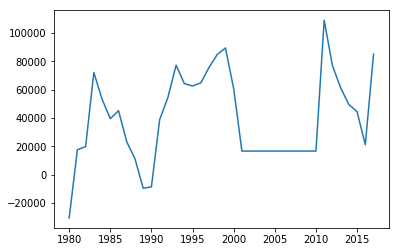

In [47]:
# extra visualiz change in pop over time
from matplotlib import pyplot as plt
plt.plot(nyc_water[1:,0],pop_dif)
